In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_x = pd.read_csv("./dataset/Logistic_X_Train.csv")
df_y = pd.read_csv("./dataset/Logistic_Y_Train.csv")
df_test = pd.read_csv("./dataset/Logistic_X_Test.csv")

In [70]:
X = df_x.values
Y = df_y.values
test = df_test.values

In [71]:
print(X.shape)
print(Y.shape)
print(test.shape)

(3000, 3)
(3000, 1)
(1000, 3)


In [72]:
type(test.shape[0])

int

In [73]:
ones_x = np.ones((X.shape[0], 1))
ones_test = ones_x[:test.shape[0], :]
X = np.hstack((ones, X))
test = np.hstack((ones_test, test))

In [74]:
print(X.shape)
print(test.shape)

(3000, 4)
(1000, 4)


In [75]:
test[:10]

array([[ 1.        , -0.76750773, -0.2618595 , -2.51483147],
       [ 1.        , -1.24165258,  1.44900144, -0.4130893 ],
       [ 1.        ,  1.92527007,  1.93176097,  1.34261917],
       [ 1.        , -1.29825474,  1.04976112, -0.52731909],
       [ 1.        , -0.96471175,  0.93808838, -1.18632767],
       [ 1.        , -2.3196728 , -0.65670494,  0.01785113],
       [ 1.        ,  1.55903662,  1.11358096,  1.73904665],
       [ 1.        , -1.01907171,  0.87699161, -1.05227309],
       [ 1.        ,  2.0184884 ,  2.29881251,  1.64428195],
       [ 1.        ,  1.38715212,  1.78661219,  0.70650862]])

In [109]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def hypothesis(x,theta):
    return sigmoid(np.dot(theta.T, x))


def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        total_error += (Y[i]*np.log2(y_hat) + (1 - Y[i])*np.log2(1 - y_hat))
    
    return -total_error/m  # average loss


def get_grad(X, Y, theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
    return grad/m


def grad_descent(X,Y,learning_rate=0.6):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta + learning_rate*get_grad(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        
    return theta,error_list

In [110]:
theta, error_list = grad_descent(X, Y)

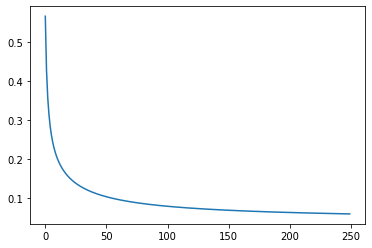

In [94]:
plt.plot(error_list);

In [95]:
df_sample = pd.read_csv("./dataset/SampleOutput.csv")

In [96]:
df_sample.head()

,label
0,1
1,1
2,1
3,0
4,0


In [111]:
def prediction(pred):
    if pred >= 0.5:
        return 1
    else:
        return 0

In [112]:
m = test.shape[0]
outcome = np.empty((m,1), np.int64)
for i in range(m):
    outcome[i] = prediction(hypothesis(test[i], theta))

In [113]:
outcome[:4]

array([[1],
       [1],
       [0],
       [1]])

In [116]:
pd.DataFrame(outcome, columns=["label"]).to_csv("Outcome.csv", index=None)

In [117]:
np.unique(outcome, return_counts=True)

(array([0, 1]), array([493, 507]))